##  MySQL IMDb Database Querying and Data Visualization

### Overview:
This notebook focuses on the visualization and analysis of the IMDb (Internet Movie Database) dataset. It involves a two-stage process: querying the database using MySQL Workbench and subsequently processing and visualizing the data using Python, specifically with pandas and matplotlib. The notebook serves as a practice tool for data visualization and is not intended as a comprehensive analysis of the IMDb dataset.

### Methodology:

#### Database Querying via MySQL Workbench: 
The initial phase involves querying the IMDb database using MySQL Workbench. This step is dedicated to extracting specific datasets that are relevant to our analysis objectives. The queries are designed to gather meaningful data that can be effectively visualized and analyzed.

#### Data Processing and Visualization with Python: 
After extracting the data, we utilize Python for further processing and visualization. The pandas library is employed for data manipulation, including cleaning, organizing, and preparing the data for visualization. Subsequently, matplotlib is used to create graphical representations of the data. These visualizations aim to provide insights into various aspects of the IMDb dataset.

### Import all the necessary libraries 

In [37]:
import pandas as pd
import matplotlib.pyplot as plt # general plotting
import matplotlib as mpl # for figure quality (dpi)
import os
import warnings

In [20]:
#reading and stroing all the structured datasets
actor = pd.read_csv('Final CSV Files/actor.tsv', delimiter='\t')
actorknownfortitles = pd.read_csv('Final CSV Files/actorknownfortitles.tsv', delimiter='\t')
director= pd.read_csv('Final CSV Files/director.tsv', delimiter='\t')
directorknownfortitles= pd.read_csv('Final CSV Files/directorknownfortitles.tsv', delimiter='\t')
Episode= pd.read_csv('Final CSV Files/Episode.tsv', delimiter='\t')
episode_alias= pd.read_csv('Final CSV Files/episode_alias.tsv', delimiter='\t')
Movie= pd.read_csv('Final CSV Files/Movie.tsv', delimiter='\t')
movie_actor_relation= pd.read_csv('Final CSV Files/movie_actor_relation.tsv', delimiter='\t')
movie_alias= pd.read_csv('Final CSV Files/movie_alias.tsv', delimiter='\t')
movie_director_relation= pd.read_csv('Final CSV Files/movie_director_relation.tsv', delimiter='\t')
movie_genre= pd.read_csv('Final CSV Files/movie_genre.tsv', delimiter='\t')
movie_writer_relation= pd.read_csv('Final CSV Files/movie_writer_relation.tsv', delimiter='\t')
Series= pd.read_csv('Final CSV Files/Series.tsv', delimiter='\t')
series_actor_relation= pd.read_csv('Final CSV Files/series_actor_relation.tsv', delimiter='\t')
series_alias= pd.read_csv('Final CSV Files/series_alias.tsv', delimiter='\t')
series_director_relation= pd.read_csv('Final CSV Files/series_director_relation.tsv', delimiter='\t')
series_genre= pd.read_csv('Final CSV Files/series_genre.tsv', delimiter='\t')
series_writer_relation= pd.read_csv('Final CSV Files/series_writer_relation.tsv', delimiter='\t')
writer= pd.read_csv('Final CSV Files/writer.tsv', delimiter='\t')
writerknownfortitles= pd.read_csv('Final CSV Files/writerknownfortitles.tsv', delimiter='\t')

C:\Users\walke\AppData\Local\Temp\ipykernel_1276\3156490754.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  Episode= pd.read_csv('Final CSV Files/Episode.tsv', delimiter='\t')


In [21]:
# change the column names of each dataset according to created tables in sql schema
actor.rename(columns={'nconst': 'actorID'}, inplace=True)
actorknownfortitles.rename(columns={'nconst': 'actorID'}, inplace=True)
director.rename(columns={'nconst': 'directorID'}, inplace=True)
directorknownfortitles.rename(columns={'nconst': 'directorID'}, inplace=True)
Episode.rename(columns={'tconst': 'episodeID','parentTconst':'seriesID'}, inplace=True)
episode_alias.rename(columns={'titleId': 'episodeID'}, inplace=True)
Movie.rename(columns={'tconst': 'movieID'}, inplace=True)
movie_actor_relation.rename(columns={'tconst': 'movieID','nconst':'actorID'}, inplace=True)
directorknownfortitles.rename(columns={'nconst': 'directorID'}, inplace=True)
movie_alias.rename(columns={'titleId': 'movieID'}, inplace=True)
movie_director_relation.rename(columns={'tconst': 'movieID','nconst':'directorID'}, inplace=True)
movie_genre.rename(columns={'tconst': 'movieID'}, inplace=True)
movie_writer_relation.rename(columns={'tconst': 'movieID','nconst':'writerID'}, inplace=True)
Series.rename(columns={'tconst': 'seriesID'}, inplace=True)
series_actor_relation.rename(columns={'tconst': 'seriesID','nconst':'actorID'}, inplace=True)
series_alias.rename(columns={'titleId': 'seriesID'}, inplace=True)
series_director_relation.rename(columns={'tconst': 'seriesID','nconst':'directorID'}, inplace=True)
series_genre.rename(columns={'tconst': 'seriesID'}, inplace=True)
series_writer_relation.rename(columns={'tconst': 'seriesID','nconst':'writerID'}, inplace=True)
writer.rename(columns={'nconst': 'writerID'}, inplace=True)
writerknownfortitles.rename(columns={'nconst': 'writerID'}, inplace=True)

In [12]:
# List of DataFrames with their names
dataframes = {
    'Actor': actor,
    'Actorknownfortitles': actorknownfortitles,
    'Director': director,
    'Directorknownfortitles': directorknownfortitles,
    'Episode': Episode,
    'Episode_alias': episode_alias,
    'Movie': Movie,
    'Movie_actor_relation': movie_actor_relation,
    'Movie_alias': movie_alias,
    'Movie_director_relation': movie_director_relation,
    'Movie_genre': movie_genre,
    'Movie_writer_relation': movie_writer_relation,
    'Series': Series,
    'Series_actor_relation': series_actor_relation,
    'Series_alias': series_alias,
    'Series_director_relation': series_director_relation,
    'Series_genre': series_genre,
    'Series_writer_relation': series_writer_relation,
    'Writer': writer,
    'Writerknownfortitles': writerknownfortitles
}

# Iterating through each DataFrame and printing column names and types
for name, df in dataframes.items():
    print(f"{name} DataFrame columns and types:")
    print(df.dtypes)
    print("\n")

Actor DataFrame columns and types:
actorID        object
primaryName    object
birthYear      object
deathYear      object
gender         object
dtype: object


Actorknownfortitles DataFrame columns and types:
actorID           object
knownForTitles    object
dtype: object


Director DataFrame columns and types:
directorID     object
primaryName    object
birthYear      object
deathYear      object
dtype: object


Directorknownfortitles DataFrame columns and types:
directorID        object
knownForTitles    object
dtype: object


Episode DataFrame columns and types:
episodeID         object
seriesID          object
seasonNumber      object
episodeNumber     object
primaryTitle      object
originalTitle     object
isAdult           object
startYear         object
averageRating    float64
numVotes         float64
dtype: object


Episode_alias DataFrame columns and types:
episodeID          object
ordering            int64
title              object
region             object
isOriginalTitl

### Formating code

In [41]:
# Fontsize
fs = 12

# Figure quality
mpl.rcParams['figure.dpi']= 100 # in notebook resolution
mpl.rc("savefig", dpi=400) # higher resolution when saving

# Set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# Set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']= 1
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

### Image folder for storing plots

In [24]:
# Create directory if doesn't already exist
img_directory = './images'
if not os.path.exists(img_directory):
    os.mkdir(img_directory)
    print("Directory: " , img_directory ,  " created.")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

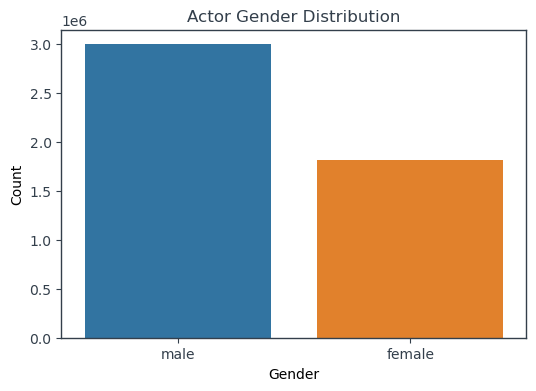

In [43]:
# Actor Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=actor)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Actor Gender Distribution',fontname='sans-serif')
plt.show()

### 1) No. of movies directed by the director and in which genre alphabetically by name and highest count as per genre? 

SELECT distinct d.primaryName, mg.genres, count(m.movieID)
FROM movie m, director d, movie_director_relation md, movie_genre mg
WHERE md.movieID = m.movieID
AND mg.movieID = m.movieID
AND md.directorID = d.directorID
GROUP BY d.primaryName,mg.genres
ORDER BY d.primaryName, count(m.movieID) DESC
LIMIT 200;

In [14]:
import pandas as pd

# Assuming you have already read your data into DataFrames named director, movie, movie_director_relation, movie_genre as you mentioned earlier

# Merge movie and movie_director_relation on 'movieID'
merged_df1 = pd.merge(Movie, movie_director_relation, on='movieID')

# Merge the result with director on 'directorID'
merged_df2 = pd.merge(merged_df1, director, on='directorID')

# Merge the result with movie_genre on 'movieID'
merged_df3 = pd.merge(merged_df2, movie_genre, on='movieID')

# Group by 'primaryName' and 'genres', and count the number of movies
result = merged_df3.groupby(['primaryName', 'genres']).size().reset_index(name='movie_count')

# Sort the result by 'primaryName' and 'movie_count' in descending order
result_sorted = result.sort_values(by=['primaryName', 'movie_count'], ascending=[True, False])

# Select the first 200 records
result_final = result_sorted.head(200)

# Display the result
print(result_final)


              primaryName     genres  movie_count
0                     $OY  Animation            1
1                     $OY      Short            1
2      &Aringsa Johansson      Drama            1
3      &Aringsa Johansson      Short            1
4    'Atlas' Ramachandran      Drama            1
..                    ...        ...          ...
195      A. Chris Moreira      Short            1
197    A. Cordell Silcott      Short            4
196    A. Cordell Silcott      Drama            3
198    A. Cordell Silcott   Thriller            1
199              A. Cyran     Comedy            1

[200 rows x 3 columns]


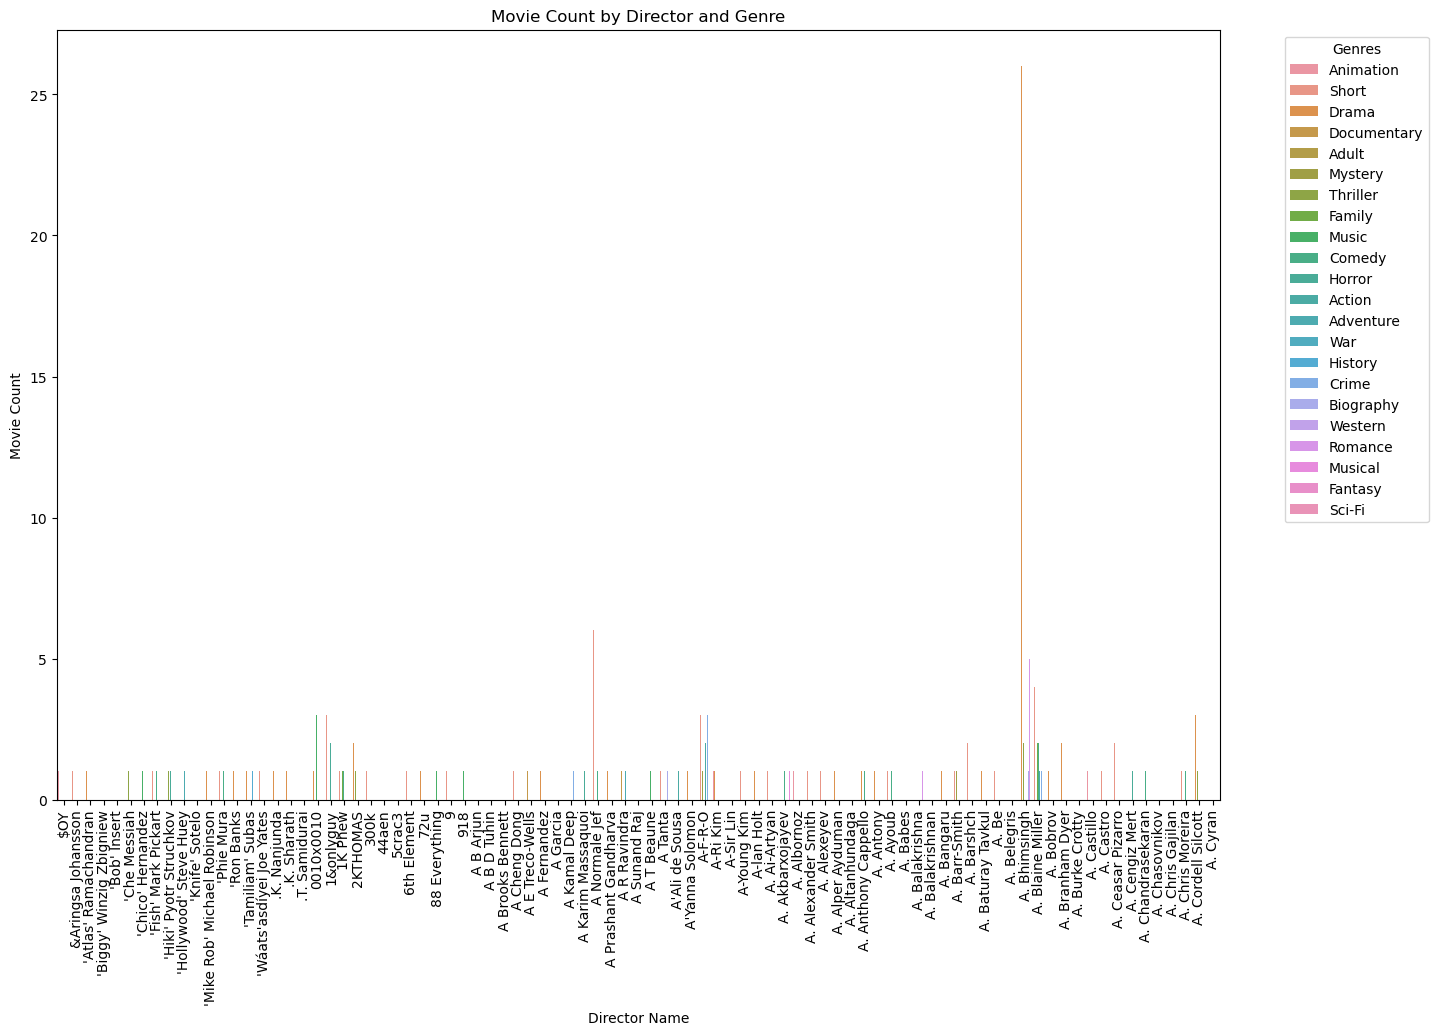

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that the top_200 DataFrame is already sorted and filtered as per previous steps
# Use Seaborn's bar plot
plt.figure(figsize=(15, 10))
sns.barplot(x='primaryName', y='movie_count', hue='genres', data=result_final)

plt.xticks(rotation=90)  # Rotate labels for better readability
plt.xlabel('Director Name')
plt.ylabel('Movie Count')
plt.title('Movie Count by Director and Genre')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position

plt.show()

### 2) Top 10 movies on basis of region

Select m.primaryTitle, ma.region, ma.title,m.averageRating
FROM movie m
INNER JOIN movie_alias ma ON m.movieID = ma.movieID
AND ma.region != 'NULL'
ORDER BY m.averageRating DESC
LIMIT 10;

In [23]:
query6=pd.read_csv('QueryResultedCSV/QUERIES_6.csv', delimiter=',')
query6

,primaryTitle,region,title,averageRating
0,Temptation,US,Temptation,10
1,Ask Aldo,US,Ask Aldo,10
2,Dying Out Loud,GB,Dying Out Loud,10
3,Sweet 16,GB,Sweet 16,10
4,Triple A,US,Triple A,10
5,Chip on My Shoulder,CA,Chip on My Shoulder,10
6,Pokoravanje,RS,Pokoravanje,10
7,"The Sun, Our Living Star",DE,"The Sun, Our Living Star",10
8,Inside Wynonna Earp: End of the world as we kn...,US,Inside Wynonna Earp: End of the world as we kn...,10
9,Zirka,UA,Zirka,10


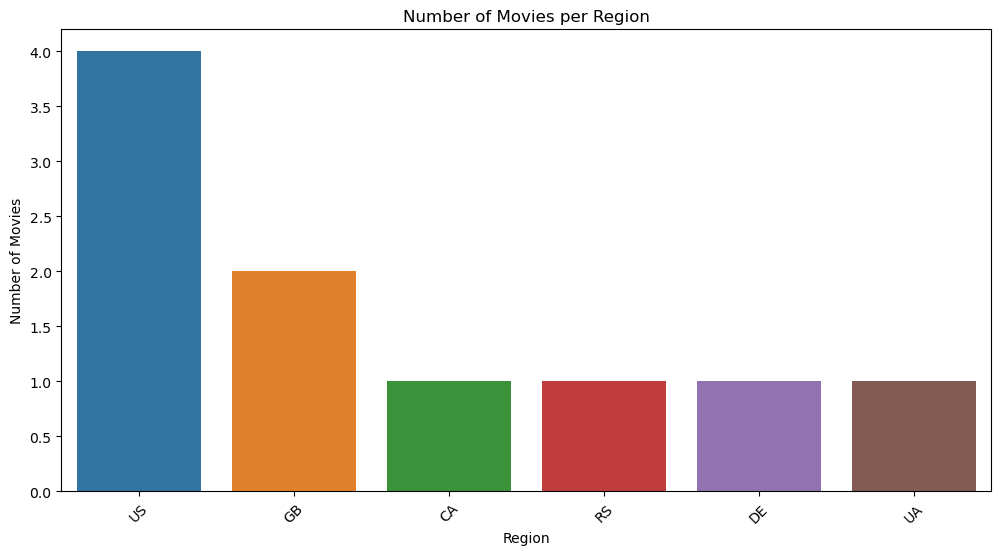

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(12, 6))
sns.countplot(x='region', data=query6)
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Region')
plt.show()

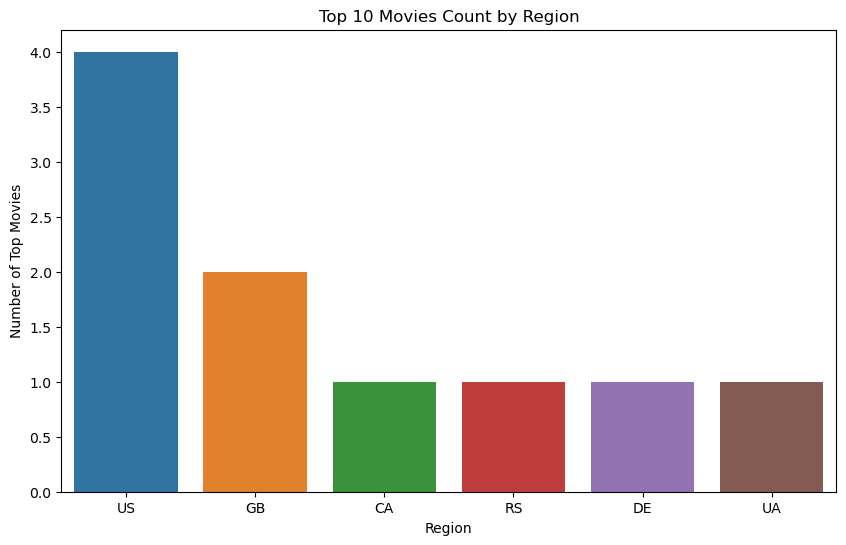

In [35]:
# Count the number of movies per region
movies_per_region = query6['region'].value_counts().reset_index()
movies_per_region.columns = ['region', 'movie_count']

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='movie_count', data=movies_per_region)
plt.xlabel('Region')
plt.ylabel('Number of Top Movies')
plt.title('Top 10 Movies Count by Region')
plt.show()

### 3) First 50 entries WriterName according to their series and their genres.

SELECT distinct w.primaryName as WriterName, s.primaryTitle, sg.genres
FROM writer w, series_writer_relation sw, series s, series_genre sg
WHERE w.writerID = sw.writerID
AND s.seriesID = sw.seriesID
AND s.seriesID = sg.seriesID
AND w.writerID NOT IN

In [55]:
query7=pd.read_csv('QueryResultedCSV/QUERIES_7.csv', delimiter=',')
query7.head()

,WriterName,primaryTitle,genres
0,John Cleese,Kullagret,Comedy\r
1,Dan Aykroyd,Blues Brothers,Animation\r
2,Dan Aykroyd,Blues Brothers,Comedy\r
3,Luc Besson,No Limit,Action\r
4,Luc Besson,No Limit,Adventure\r


) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


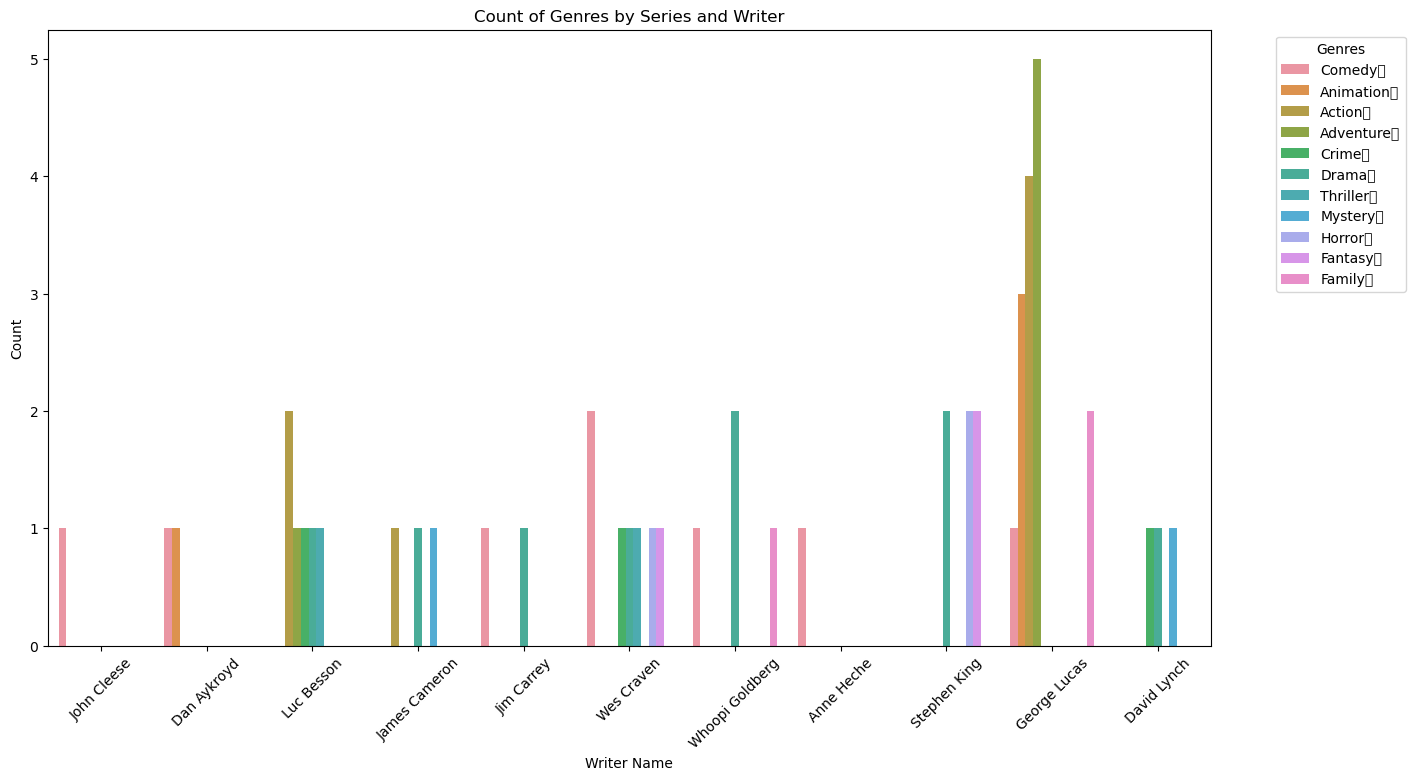

In [44]:
# Assuming the DataFrame is already sorted and limited to the first 50 entries
df_first_50 =query7.head(50)

# Creating a grouped bar plot
plt.figure(figsize=(15, 8))
sns.countplot(x='WriterName', hue='genres', data=df_first_50)
plt.xticks(rotation=45)
plt.xlabel('Writer Name')
plt.ylabel('Count')
plt.title('Count of Genres by Series and Writer')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


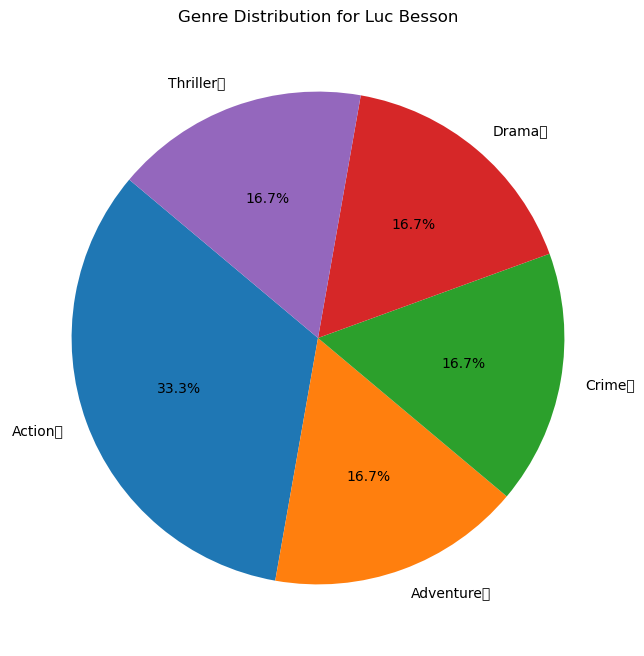

In [45]:
# Filter the DataFrame for a specific writer
writer_name = 'Luc Besson'
df_writer = query7[query7['WriterName'] == writer_name]

# Count the number of titles per genre for this writer
genre_counts = df_writer['genres'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Genre Distribution for {writer_name}')
plt.show()

### 4) Count of movies in each genre, according to the highest first HAVING movies greater than 20000.
SELECT distinct genres, count(movieID)
FROM movie_genre
GROUP BY genres
HAVING count(movieID) > 20000;


In [60]:
query8=pd.read_csv('QueryResultedCSV/QUERIES_7.csv')
query8.head()

,WriterName,primaryTitle,genres
0,John Cleese,Kullagret,Comedy\r
1,Dan Aykroyd,Blues Brothers,Animation\r
2,Dan Aykroyd,Blues Brothers,Comedy\r
3,Luc Besson,No Limit,Action\r
4,Luc Besson,No Limit,Adventure\r


) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


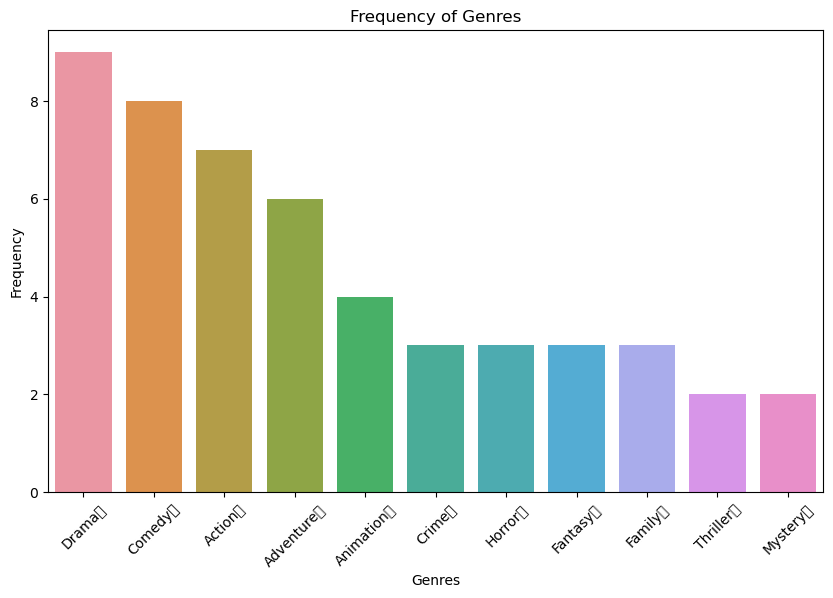

In [54]:
# Count the occurrences of each genre
genre_counts = query8['genres'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Frequency of Genres')
plt.show()

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


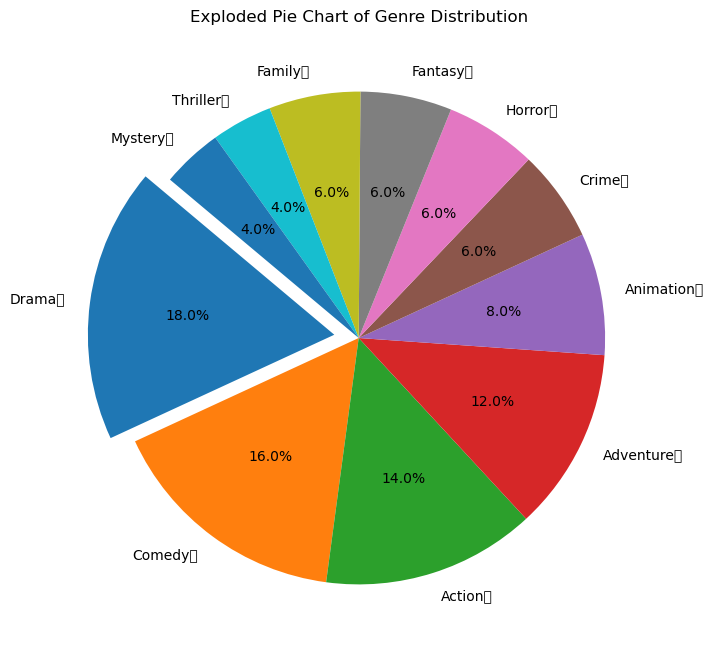

In [58]:
# Assuming df['genres'] is cleaned (without '\r')
genre_counts = query8['genres'].value_counts()

# Explode the largest sector
explode = [0.1 if i == genre_counts.idxmax() else 0 for i in genre_counts.index]

plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Exploded Pie Chart of Genre Distribution')
plt.show()


### 5)Count the occurrences of each genre per writer


) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


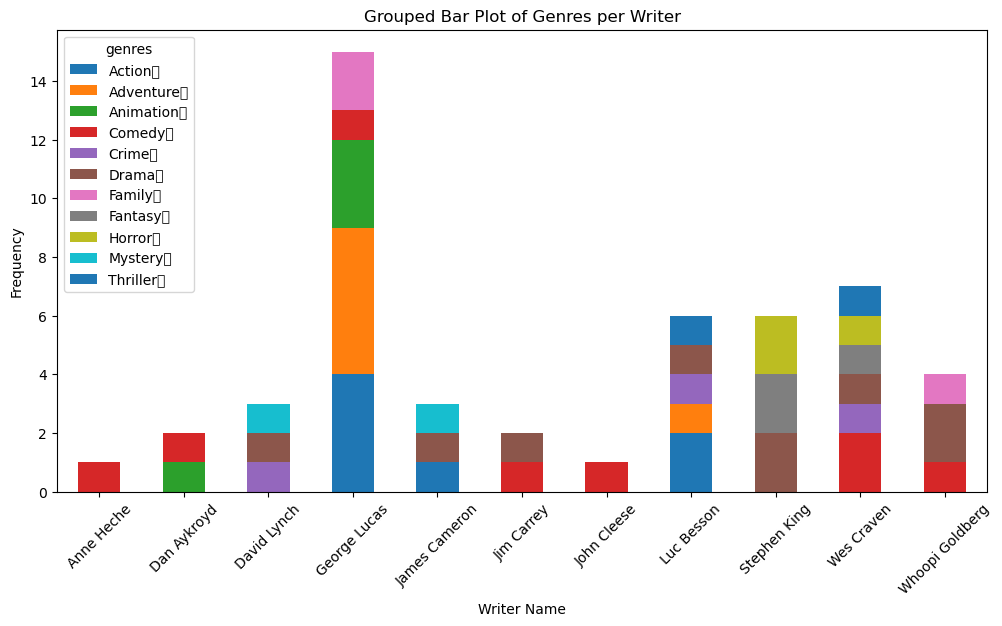

In [59]:
# Count the occurrences of each genre per writer
genre_writer_counts = query8.groupby(['WriterName', 'genres']).size().unstack().fillna(0)

# Plot
genre_writer_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Writer Name')
plt.ylabel('Frequency')
plt.title('Grouped Bar Plot of Genres per Writer')
plt.xticks(rotation=45)
plt.show()


### 6) Find the total number of movies released each year:

SELECT releaseYear, COUNT(*) as totalMovies
FROM movie
GROUP BY releaseYear;

In [61]:
query9=pd.read_csv('QueryResultedCSV/simple_q5.csv')
query9.head()

,releaseYear,totalMovies
0,2010.0,44497
1,1894.0,98
2,1892.0,8
3,1893.0,5
4,1895.0,114


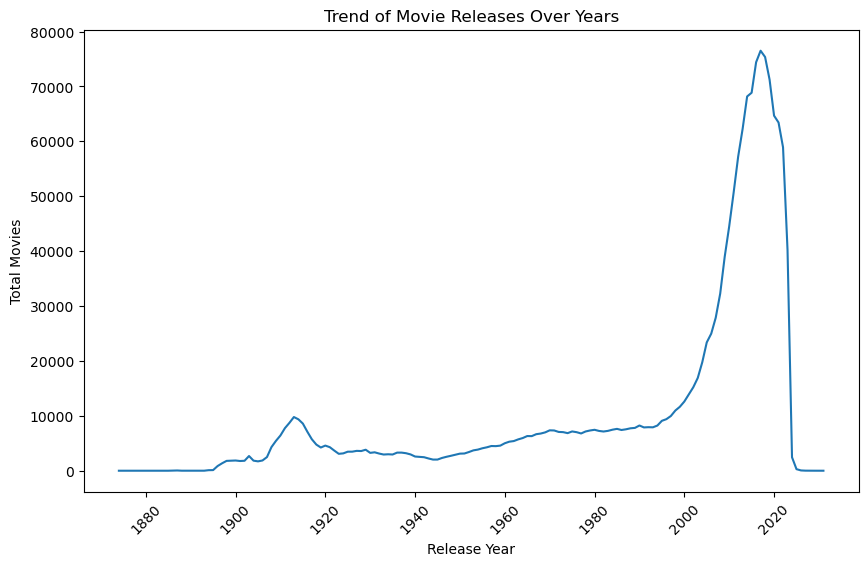

In [63]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='releaseYear', y='totalMovies', data=query9)
plt.xlabel('Release Year')
plt.ylabel('Total Movies')
plt.title('Trend of Movie Releases Over Years')
plt.xticks(rotation=45)
plt.show()


### 7)Total Movies Released by Decade

In [67]:
# Drop rows where releaseYear is NaN
query9 = query9.dropna(subset=['releaseYear'])

# Now convert to integer
query9['releaseYear'] = query9['releaseYear'].astype(int)

In [68]:
# Convert releaseYear to integers
query9['releaseYear'] = query9['releaseYear'].astype(int)

# Define the bins for the decades
bins = range(query9['releaseYear'].min() - (query9['releaseYear'].min() % 10), query9['releaseYear'].max() + 10, 10)

# Group by decades
query9['decade'] = pd.cut(query9['releaseYear'], bins, right=False)

# Group by the new decade column and sum the totalMovies
decade_df = query9.groupby('decade')['totalMovies'].sum().reset_index()

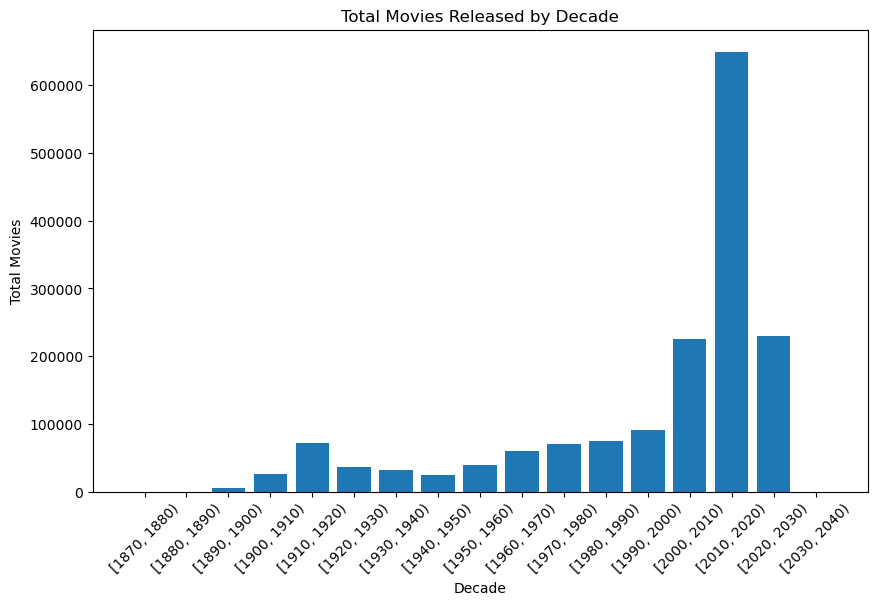

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(decade_df['decade'].astype(str), decade_df['totalMovies'])
plt.xlabel('Decade')
plt.ylabel('Total Movies')
plt.title('Total Movies Released by Decade')
plt.xticks(rotation=45)
plt.show()

### 8)Trend of Movie Releases Over Decades

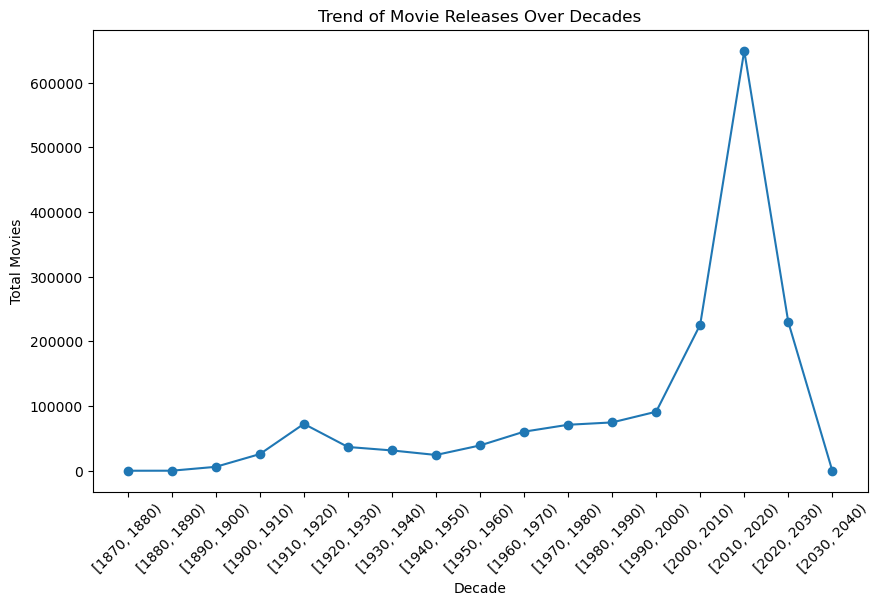

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(decade_df['decade'].astype(str), decade_df['totalMovies'], marker='o')
plt.xlabel('Decade')
plt.ylabel('Total Movies')
plt.title('Trend of Movie Releases Over Decades')
plt.xticks(rotation=45)
plt.show()

### 9) List series along with their genres:

SELECT s.primaryTitle, sg.genres
FROM series s
JOIN series_genre sg ON s.seriesID = sg.seriesID;

In [73]:
query10=pd.read_csv('QueryResultedCSV/simple_q8.csv')
query10.head()

,primaryTitle,genres
0,The German Weekly Review,Documentar
1,The German Weekly Review,News\r
2,You Are an Artist,Talk-Show\r
3,Americana,Family\r
4,Americana,Game-Show\r


) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


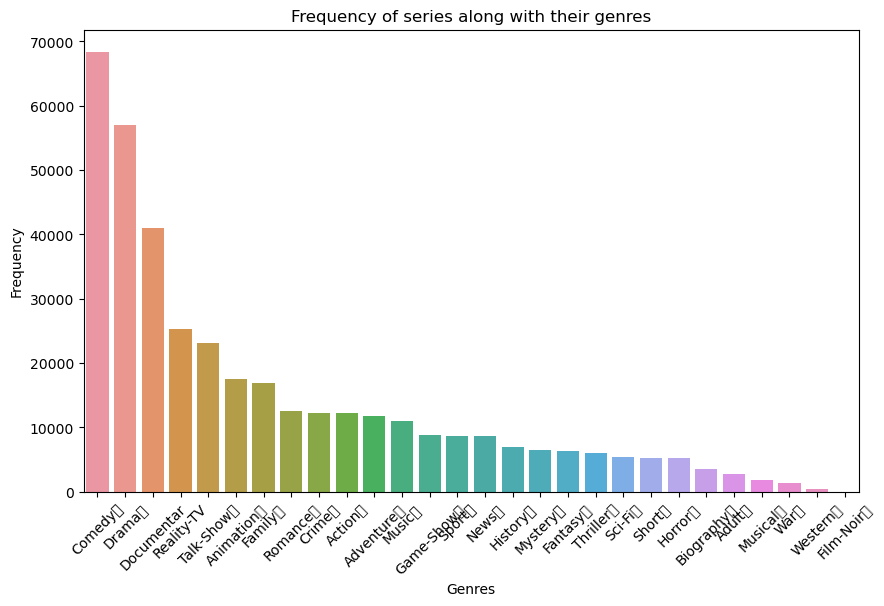

In [75]:
# Count the occurrences of each genre
genre_counts = query10['genres'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Frequency of series along with their genres')
plt.show()

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


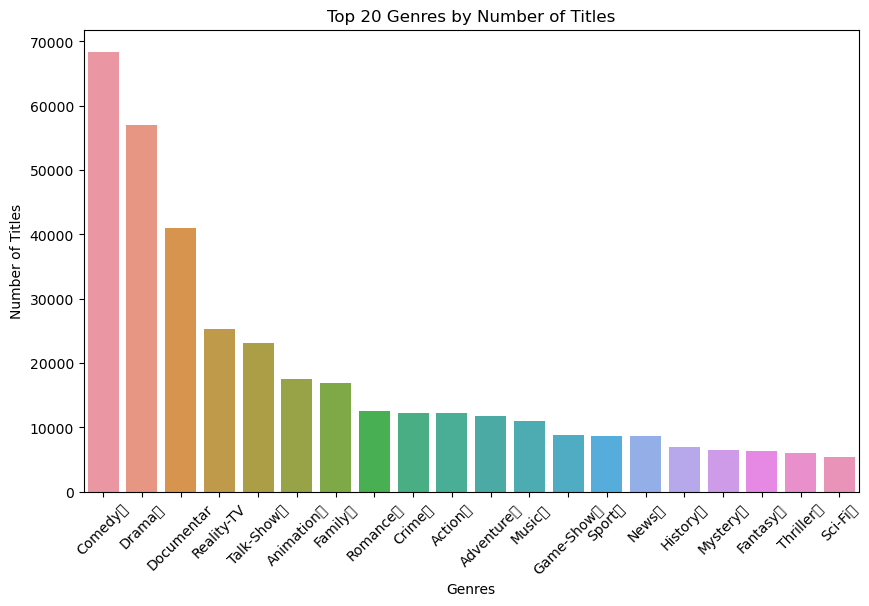

In [77]:
# Count the number of titles per genre
genre_counts = query10['genres'].value_counts()

# Plotting (showing only top 20 genres for clarity)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.head(20).index, y=genre_counts.head(20).values)
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Number of Titles')
plt.title('Top 20 Genres by Number of Titles')
plt.show()

### 10)Genre Distribution (series along with their genres)

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


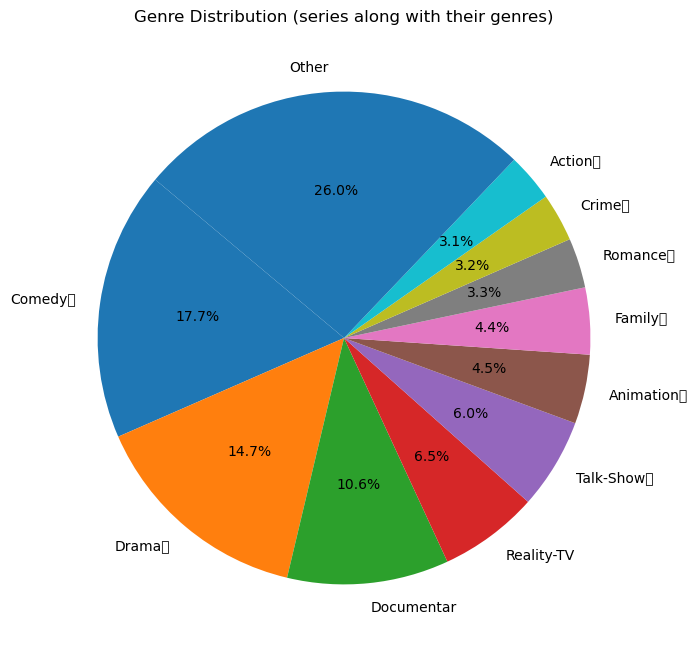

In [79]:
# Aggregating smaller categories into 'Other'
top_genres = genre_counts.head(10)
top_genres['Other'] = genre_counts[10:].sum()

plt.figure(figsize=(8, 8))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution (series along with their genres)')
plt.show()

### 11) List series along with their genres:

SELECT s.primaryTitle, sg.genres
FROM series s
JOIN series_genre sg ON s.seriesID = sg.seriesID;

In [33]:
query11=pd.read_csv('QueryResultedCSV/simple_q9.csv')
query11.head()

,primaryTitle,NumberOfEpisodes
0,Voice of Firestone Televues,1
1,You Are an Artist,7
2,Americana,4
3,The Borden Show,6
4,Kraft Theatre,589


In [34]:
query11

,primaryTitle,NumberOfEpisodes
0,Voice of Firestone Televues,1
1,You Are an Artist,7
2,Americana,4
3,The Borden Show,6
4,Kraft Theatre,589
...,...,...
194781,H.A.N (Hommes Animaux Nature),23
194782,Nojor,198
194783,Kalyanam Mudhal Kadhal Varai,583
194784,Meie aasta Aafrikas,12


### 12) What is a typical runtime for movies in each genre?
SELECT G.genres, T.runtimeMinutes 
FROM movie AS T, movie_genre AS G 
WHERE T.runtimeMinutes IS NOT NULL
AND T.movieID = G.movieID;

In [25]:
query12=pd.read_csv('QueryResultedCSV/simple_q21.csv')
query12.head()

,genres,runtimeMinutes
0,Documentar,1
1,Short\r,1
2,Animation\r,5
3,Short\r,5
4,Animation\r,4


findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

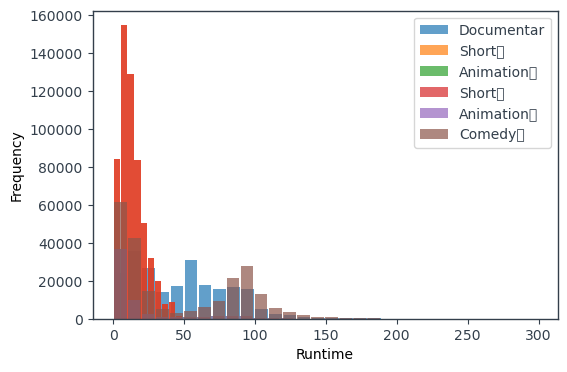

In [28]:
genres=query12.genres
fig = plt.figure(figsize=(6,4))

# Only consider the top 6 genres 
for g in genres[:6]:

    # Series contain genre g runtime data 
    sg = query12[query12.genres.str.match(g) & (query12['runtimeMinutes'] < 300)]['runtimeMinutes']

    # Plot histogram for g using matplotlib
    n, bins, patches = plt.hist(sg,bins=30,alpha=0.7,rwidth=0.9,label=g)

# Labels 
plt.xlabel('Runtime')
plt.ylabel('Frequency')

# Legend 
plt.legend()

# Save it
plt.savefig(os.path.join(img_directory,'Top_6_genres_runtime_hist.png'), bbox_inches="tight")

### 13) What genres are there? How many movies are there in each genre?
SELECT G.genres, COUNT(G.genres) AS Count
FROM movie_genre AS G, movie AS T
WHERE T.movieID = G.movieID
GROUP BY genres
ORDER BY Count DESC;

In [14]:
query13=pd.read_csv('QueryResultedCSV/simple_q22.csv')
query13.head()

,genres,Count
0,Short\r,909958
1,Drama\r,557698
2,Comedy\r,325836
3,Documentar,316098
4,Horror\r,94529


AttributeError: 'Spine' object has no attribute 'set_smart_bounds'

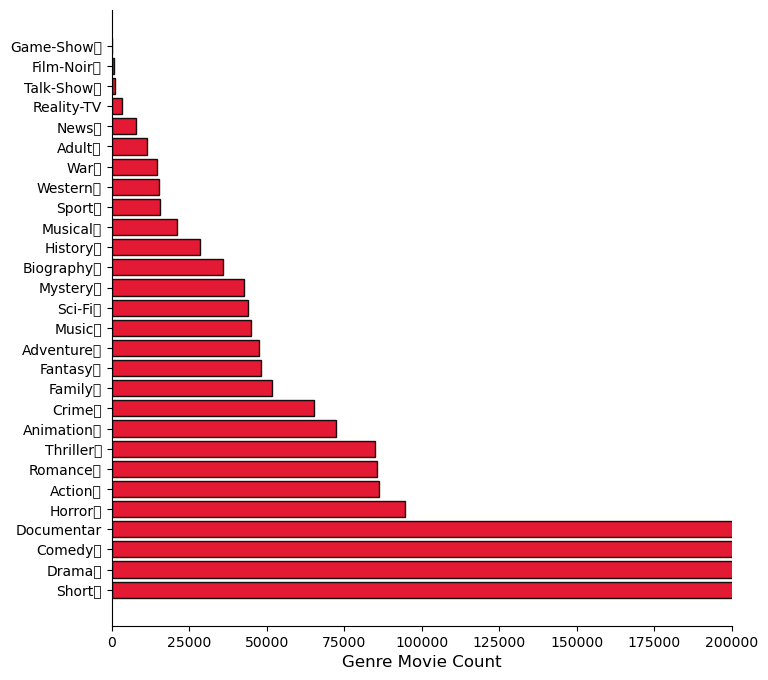

In [18]:
genres = query13.genres

fig = plt.figure(figsize=(8,8))
# Fontsize
fs = 12
# Bar chart
plt.barh(query13['genres'],query13['Count'], align='center',
         alpha=0.9,color='#E1001E',edgecolor='black')

# Limit
plt.xlim([0,200000])

# X label
plt.xlabel('Genre Movie Count',fontsize=fs)

# Change the style of the axis spines
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# Set the spines position
ax.spines['bottom'].set_position(('axes', -0.02))
ax.spines['left'].set_position(('axes', -0.025))

# Save it
plt.savefig(os.path.join(img_directory,'Genre_movie_count.png'), bbox_inches="tight")

### 14) How many movies are made in each genre each year?
SELECT T.releaseYear, G.genres, COUNT(DISTINCT T.movieID) AS Number_of_movies
FROM movie AS T, movie_genre AS G
WHERE T.movieID = G.movieID
AND T.releaseYear <= 2019
GROUP BY T.releaseYear, G.genres
ORDER BY T.releaseYear DESC, G.genres ASC;

In [29]:
query14=pd.read_csv('QueryResultedCSV/simple_q23.csv')
query14.head()

,releaseYear,genres,Number_of_movies
0,2019,Action\r,2809
1,2019,Adult\r,197
2,2019,Adventure\r,1367
3,2019,Animation\r,2574
4,2019,Biography\r,1174


findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

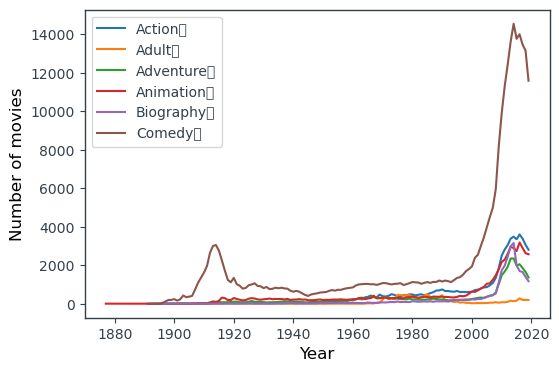

In [32]:
genres = query14.genres
fig = plt.figure(figsize=(6,4))

# For each genre g in genres (only consider the top 6 genres)
for g in genres[:6]:
    
    # Data for a particular genre 
    g_df = query14[query14.genres.str.contains(g)]

    # Plot number of movies for this genre vs year 
    plt.plot(g_df['releaseYear'],g_df['Number_of_movies'],label=g)

# Legend
plt.legend()

# Labels
plt.xlabel('Year',fontsize=fs)
plt.ylabel('Number of movies',fontsize=fs)

# Save it
plt.savefig(os.path.join(img_directory,'Genre_movie_count_vs_year.png'), bbox_inches="tight")